In [1]:
from portfolio_helpers import *
from market import *
from market_ml import *
from company import *
import random
from market_screener import *

In [2]:
c = Company('AAPL')
c.predict_price_using_xgb(0)

{'annualHoldingsTurnover': {}, 'enterpriseToRevenue': {'raw': 6.084, 'fmt': '6.08'}, 'beta3Year': {}, 'profitMargins': {'raw': 0.21350001, 'fmt': '21.35%'}, 'enterpriseToEbitda': {'raw': 21.091, 'fmt': '21.09'}, '52WeekChange': {'raw': 0.78771544, 'fmt': '78.77%'}, 'morningStarRiskRating': {}, 'forwardEps': {'raw': 14.94, 'fmt': '14.94'}, 'revenueQuarterlyGrowth': {}, 'sharesOutstanding': {'raw': 4334329856, 'fmt': '4.33B', 'longFmt': '4,334,329,856'}, 'fundInceptionDate': {}, 'annualReportExpenseRatio': {}, 'totalAssets': {}, 'bookValue': {'raw': 18.137, 'fmt': '18.14'}, 'sharesShort': {'raw': 33962851, 'fmt': '33.96M', 'longFmt': '33,962,851'}, 'sharesPercentSharesOut': {'raw': 0.0078, 'fmt': '0.78%'}, 'fundFamily': None, 'lastFiscalYearEnd': {'raw': 1569628800, 'fmt': '2019-09-28'}, 'heldPercentInstitutions': {'raw': 0.62115, 'fmt': '62.12%'}, 'netIncomeToCommon': {'raw': 57215000576, 'fmt': '57.22B', 'longFmt': '57,215,000,576'}, 'trailingEps': {'raw': 12.728, 'fmt': '12.73'}, 'las

## Example Code

### Test out Bollinger Band trading algorithm

In [5]:
# First lets add some companies to our universe of stocks
tickers_all = get_tickers()
print('Initial number of tickers:', len(tickers_all))
pe_filtered_tickers = pe_ratio_to_industry_filter(tickers_all, .6, '2019-11-20', industry_averages=None, path='')
print('After pe filter:', len(pe_filtered_tickers))
filtered = ev_rev_to_industry_filter(pe_filtered_tickers, .6, '2019-11-20', industry_averages=None, path='')
print('After ev/rev filter:', len(filtered))
companies = get_companies(filtered)#['AAPL', 'SNE', 'MSFT', 'COST', 'FB', 'T', 'TSLA', 'VZ'])
stock_prices = get_stock_prices(companies, lookback_window=int(252*8/12))
market_proxy = get_companies(['VTI'])
market_proxy_price = get_stock_prices(market_proxy, lookback_window=int(252*8/12))

# Now lets see the log returns we would have made using the bollinger band algorithm 
bollinger_band_algo(stock_prices, 10, market_proxy_price)

Initial number of tickers: 6711
After pe filter: 1126
After ev/rev filter: 574
Failed to get industry for ADMP
Failed to get industry for ADXS
Failed to get industry for AEZS
Failed to get industry for AIRI
Failed to get industry for ALIM
Failed to get industry for ALLT
Failed to get industry for ALT
Failed to get industry for APDN
Failed to get industry for APRN
Failed to get industry for APVO
Failed to get industry for ASM
Failed to get industry for ATEC
Failed to get industry for AU
Failed to get industry for AUTO
Failed to get industry for AVGR
Failed to get industry for AVNW
Failed to get industry for AXDX
Failed to get industry for BIOC
Failed to get industry for BIOL
Failed to get industry for BLCM
Failed to get industry for BMRA
Failed to get industry for BWEN
Failed to get industry for CAL
Failed to get industry for CANF
Failed to get industry for CAPR
Failed to get industry for CBB
Failed to get industry for CECE
Failed to get industry for CEMI
Failed to get industry for CHFS

### Fundamental analysis of a company

- ATLC: 1d data not available for startTime=-2208988800 and endTime=1595563080. Only 100 years worth of day granularity data are allowed to be fetched per request.
Failed to get industry for DXF
- ELVT: 1d data not available for startTime=-2208988800 and endTime=1595563106. Only 100 years worth of day granularity data are allowed to be fetched per request.
- ENVA: 1d data not available for startTime=-2208988800 and endTime=1595563109. Only 100 years worth of day granularity data are allowed to be fetched per request.
Failed to get industry for FCFS
fetch data failed for : FCFS
- LX: 1d data not available for startTime=-2208988800 and endTime=1595563128. Only 100 years worth of day granularity data are allowed to be fetched per request.
Failed to get industry for MGI
- NNI: 1d data not available for startTime=-2208988800 and endTime=1595563148. Only 100 years worth of day granularity data are allowed to be fetched per request.
Failed to get industry for OCSL
- PYPL: 1d data not availabl

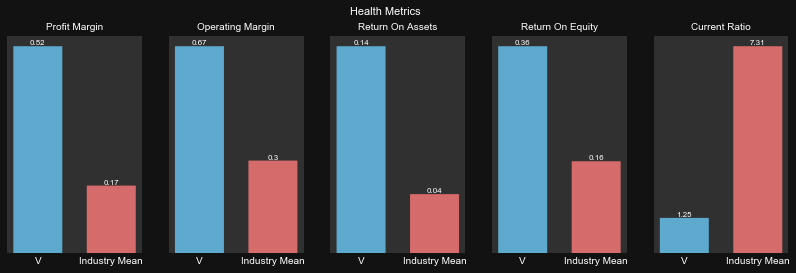

Health Score: 4 / 5


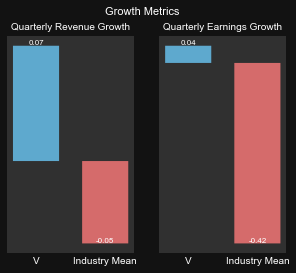

Growth Score: 2 / 2


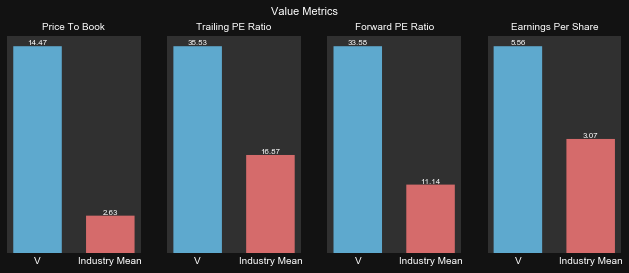

Value Score: 1 / 4
Analyst Target (32 analysts): 8.668895304664947%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: 0.0167835298857638
Volatility (Standard Dev.): 0.1


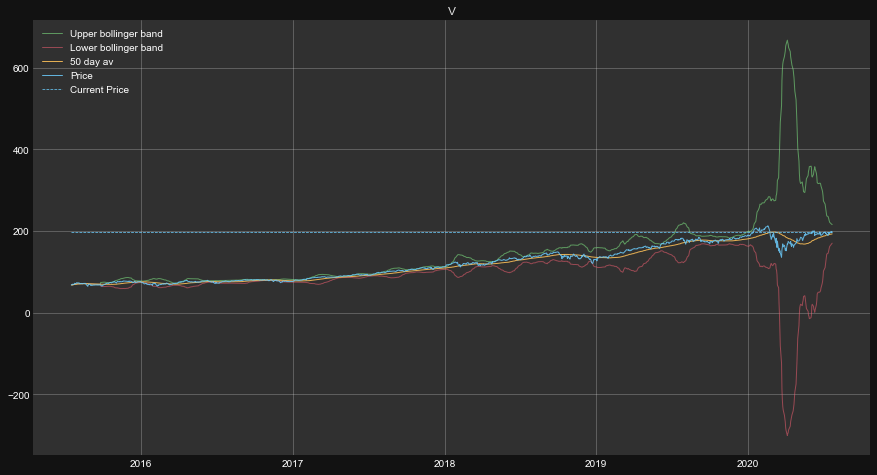

Current price: 197.43
Multiples valuation for V
V's ebitda is 16353000448
Industry EV/EBITDA: (Mean = 32.0) (Median = 25.0)
V's revenue is 23885000704
Industry EV/Revenue: (Mean = 12.0) (Median = 8.0)
V's earnings are 12033999872
Industry PE ratios: (Mean = 22.0) (Median = 15.0)
Valuation: 239.13995982057193 (using EV/EBITDA multiple)
Valuation: 105.9004005539342 (using EV/revenue multiple)
Valuation: 103.98705792755642 (using PE ratio multiple)


7

In [3]:
c = Company("V")
c.analyze(filter_comparables=True)
#c.analyze(comparable_tickers=["BAC", "JPM", "WFC"], filter_comparables=False)

### Calculating optimal portfolio weights given a list of companies.

In [4]:
portfolio = create_portfolio(["EA", "NVDA", "MSFT", "AAPL"])#["BABA", "AMZN", "AAPL", "BIDU", "SFUN", "REGN", "TSLA", "DDD", "NVDA"])
w = portfolio.calculate_optimal_weights()
print('Optimal weights:', w)
calculate_quantity_shares_per_ticker(portfolio, 200000)

Failed to get industry for VTI
Expected Market Return: 0.011496573864158836
Expected Stdev of market return: 0.06546731226840341
Fetching Portfolio Data
Getting data for EA
Expected return: 0.022601076638199866
Standard Deviation: 0.0889553540892407
Beta: 0.928847
Alpha: 0.011922518494197523
Getting data for NVDA
Expected return: 0.06387916786512246
Standard Deviation: 0.15866883236601032
Beta: 1.343077
Alpha: 0.0484383839293696
Getting data for MSFT
Expected return: 0.04024866410329975
Standard Deviation: 0.061682923631320594
Beta: 0.925537
Alpha: 0.029608159618787766
Getting data for AAPL
Expected return: 0.030981686527885844
Standard Deviation: 0.11370484769457982
Beta: 1.170435
Alpha: 0.0175256940971891
Optimal weights: [0.11988228 0.15308674 0.61917396 0.10785702]


[196.5766644302388, 85.69086827817992, 659.6079262005173, 63.670026383603854]

In [4]:
[atvi, sne, ea, msft, cost]
w = [0.26934317, 0.12867101, 0.47506942, 0.04599636, 0.080920049]
print(p.calculate_sharpe_ratio(w, .0955, cov_matrix=cov_matrix))
print(p.calculate_sharpe_ratio([0.2, 0.1, 0.5, 0.1, 0.1], 0.0955, cov_matrix=cov_matrix))

0.4748825765244376
0.47215141125452564


In [2]:
w = [0.4, 0.4, 0.3]
p.calculate_sharpe_ratio(w, 9.5, cov_matrix=cov_matrix)

NameError: name 'p' is not defined

### Compare companies by analysis scores.

Failed to get industry for CLSK
Failed to get industry for CYRN
Failed to get industry for JCOM
Failed to get industry for MFGP
Failed to get industry for NETE
Failed to get industry for TAOP
Failed to get industry for TCX
Failed to get industry for TLND
Failed to get industry for ZIXI


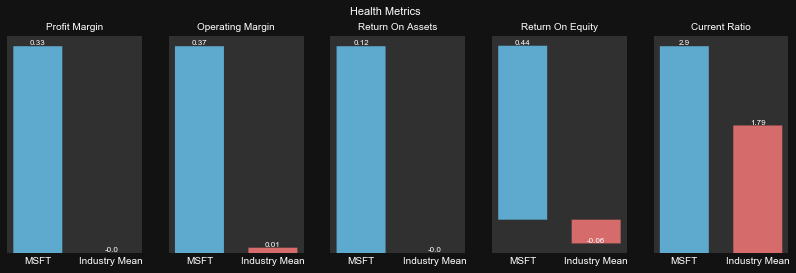

Health Score: 5 / 5


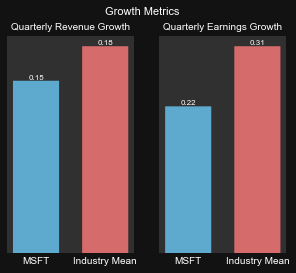

Growth Score: 0 / 2


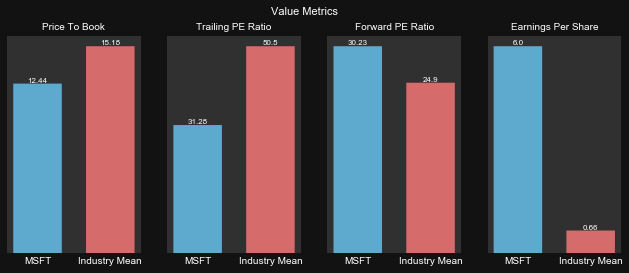

Value Score: 3 / 4
Analyst Target (32 analysts): 6.271971875998705%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: 0.029608159618787766
Volatility (Standard Dev.): 0.09


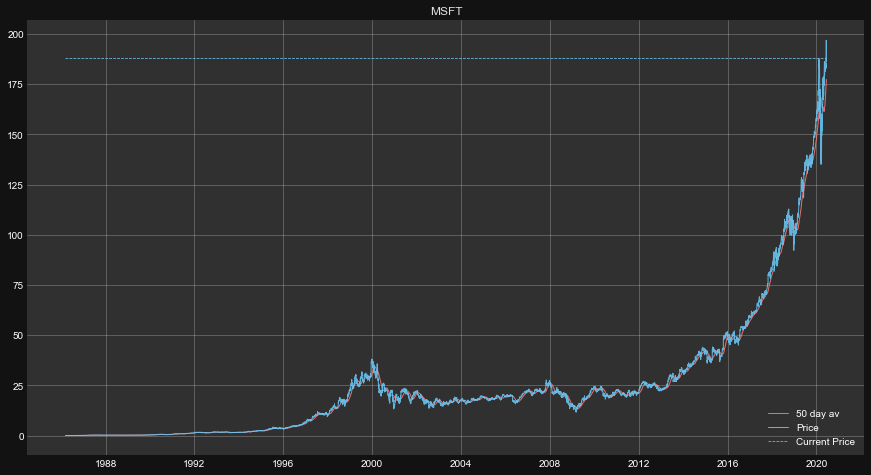

Current price: 187.74
Multiples valuation for MSFT
MSFT's ebitda is 64091000832
Industry EV/EBITDA: (Mean = 58.0) (Median = 13.0)
MSFT's revenue is 138698997760
Industry EV/Revenue: (Mean = 11.0) (Median = 7.0)
MSFT's earnings are 46265999360
Industry PE ratios: (Mean = 65.0) (Median = 43.0)
Valuation: 120.37821137441361 (using EV/EBITDA multiple)
Valuation: 141.25589041212496 (using EV/revenue multiple)
Valuation: 263.8864196665651 (using PE ratio multiple)
Failed to get industry for CAL


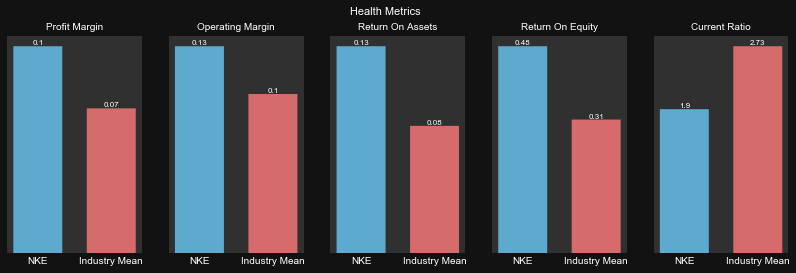

Health Score: 4 / 5


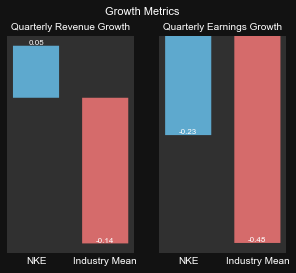

Growth Score: 2 / 2


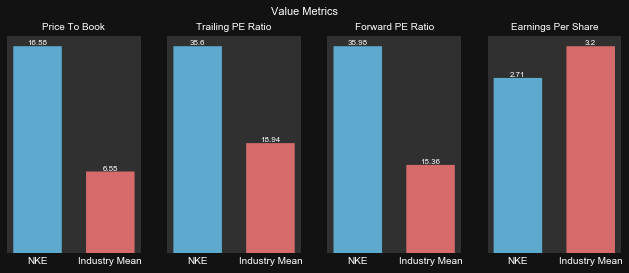

Value Score: 0 / 4
Analyst Target (31 analysts): 0.0466659753188603%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: 0.0010567130633434701
Volatility (Standard Dev.): 0.1


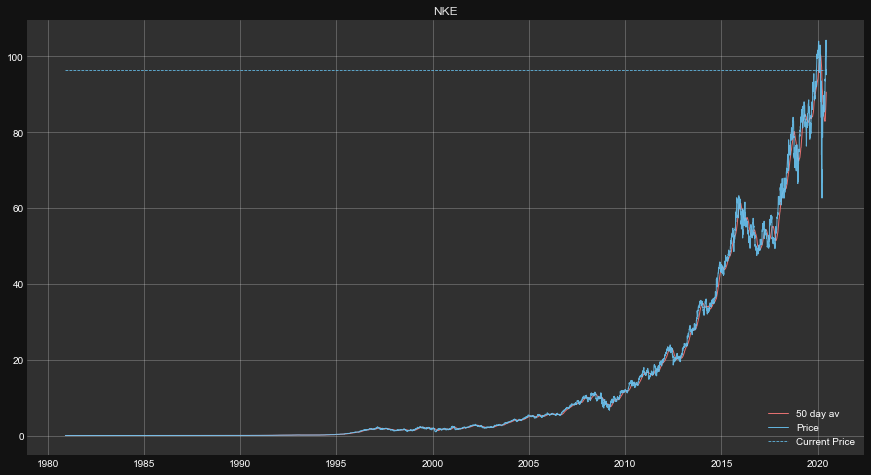

Current price: 96.43
Multiples valuation for NKE
NKE's ebitda is 5859999744
Industry EV/EBITDA: (Mean = 12.0) (Median = 11.0)
NKE's revenue is 41273999360
Industry EV/Revenue: (Mean = 1.0) (Median = 1.0)
NKE's earnings are 4318000128
Industry PE ratios: (Mean = 19.0) (Median = 20.0)
Valuation: 50.05030331422171 (using EV/EBITDA multiple)
Valuation: 34.504165250943736 (using EV/revenue multiple)
Valuation: 70.97972752895024 (using PE ratio multiple)
Failed to get industry for DUK
Failed to get industry for HE
Failed to get industry for NEE
Failed to get industry for PNW
Failed to get industry for PPL
Failed to get industry for XEL


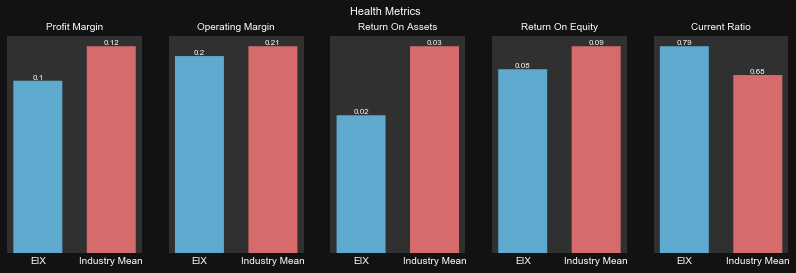

Health Score: 1 / 5


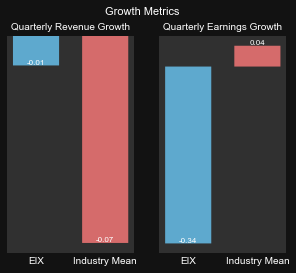

Growth Score: 1 / 2


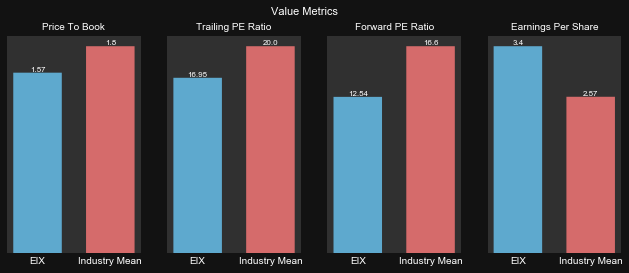

Value Score: 4 / 4
Analyst Target (13 analysts): 19.854090672225123%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: -0.005237179343129763
Volatility (Standard Dev.): 0.13


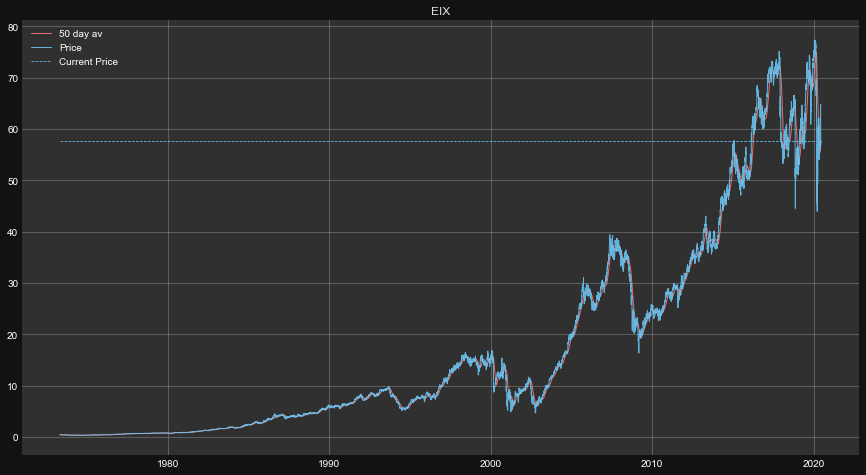

Current price: 57.57
Multiples valuation for EIX
EIX's ebitda is 4104000000
Industry EV/EBITDA: (Mean = 12.0) (Median = 12.0)
EIX's revenue is 12312999936
Industry EV/Revenue: (Mean = 4.0) (Median = 5.0)
EIX's earnings are 1188999936
Industry PE ratios: (Mean = 20.0) (Median = 21.0)
Valuation: 77.19115201012436 (using EV/EBITDA multiple)
Valuation: 100.42848203619273 (using EV/revenue multiple)
Valuation: 67.49624890290917 (using PE ratio multiple)
Failed to get industry for HEAR
Failed to get industry for VUZI


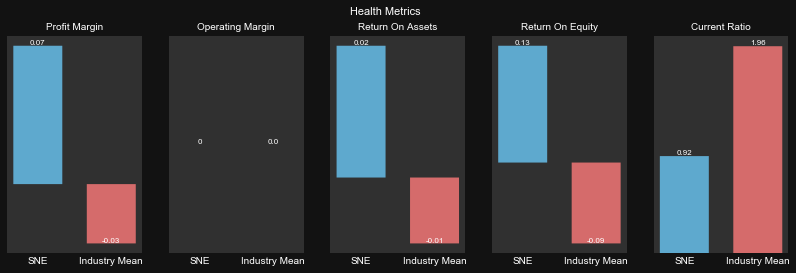

posx and posy should be finite values
posx and posy should be finite values


Health Score: 3 / 5


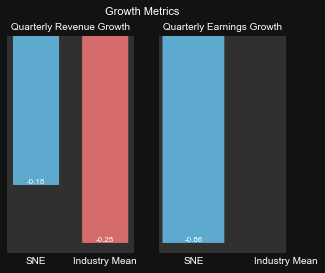

Growth Score: 1 / 2


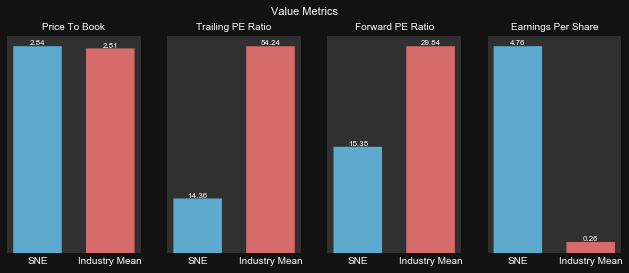

Value Score: 3 / 4
Analyst Target (3 analysts): 6.955630399765678%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: 0.01818956203424836
Volatility (Standard Dev.): 0.11


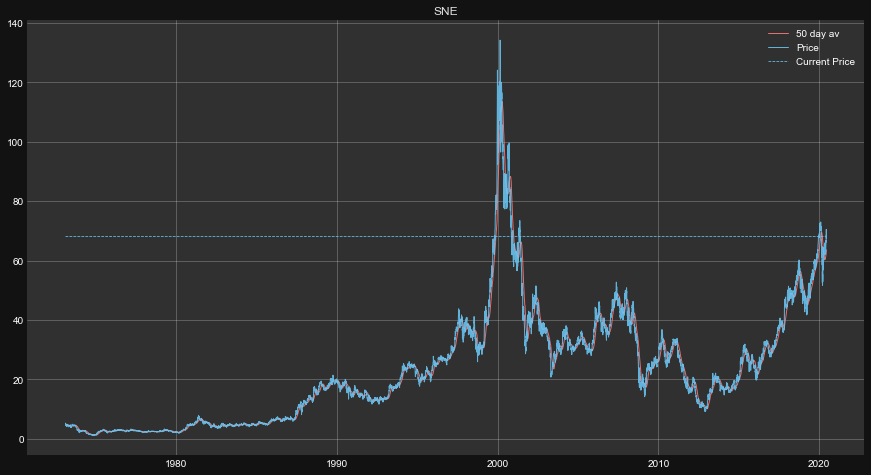

Current price: 68.29
Multiples valuation failed for SNE
Failed to get industry for AUTO
Failed to get industry for DAO
Failed to get industry for GAIA
Failed to get industry for IAC
Failed to get industry for IZEA
Failed to get industry for KRKR
Failed to get industry for LEAF
Failed to get industry for PCOM
Failed to get industry for PERI
Failed to get industry for SFUN
Failed to get industry for TME


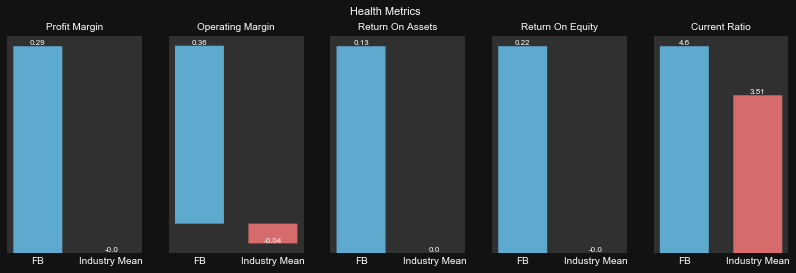

Health Score: 5 / 5


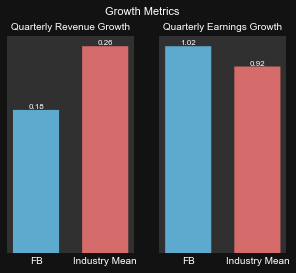

Growth Score: 1 / 2


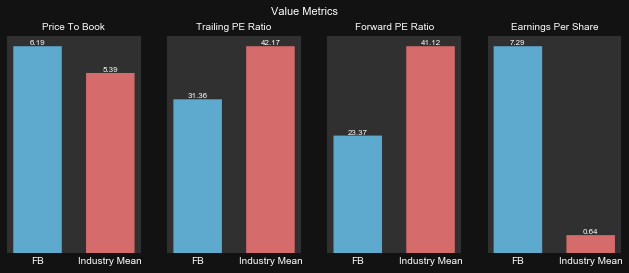

Value Score: 3 / 4
Analyst Target (47 analysts): 6.741622189167895%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: 0.0013978862511891295
Volatility (Standard Dev.): 0.14


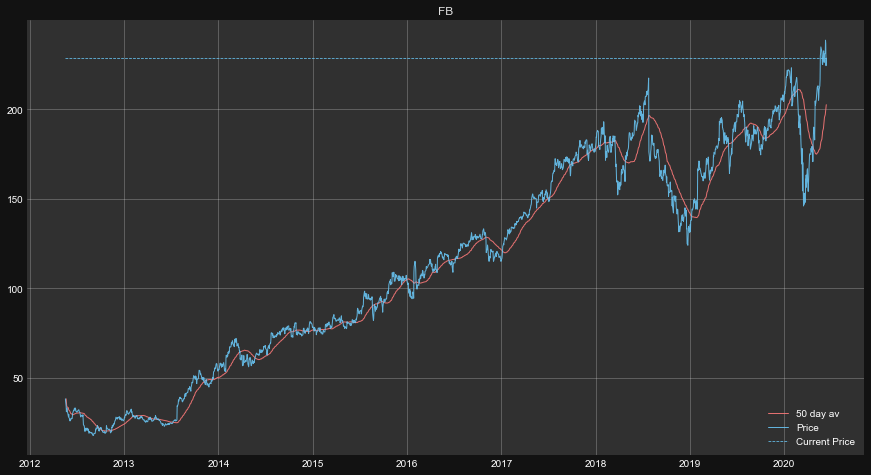

[[<company.Company at 0x1fb1cd36888>, 6],
 [<company.Company at 0x1fb1ca52108>, 6],
 [<company.Company at 0x1fb1d09e508>, 7],
 [<company.Company at 0x1fb1d09e4c8>, 8],
 [<company.Company at 0x1fb1d09e548>, 9]]

Current price: 228.58
Multiples valuation for FB
FB's ebitda is 32544999424
Industry EV/EBITDA: (Mean = -3.0) (Median = 6.0)
FB's revenue is 73357000704
Industry EV/Revenue: (Mean = 8.0) (Median = 5.0)
FB's earnings are 20957999104
Industry PE ratios: (Mean = 66.0) (Median = 23.0)
Valuation: 99.29709809996301 (using EV/EBITDA multiple)
Valuation: 177.64605654314542 (using EV/revenue multiple)
Valuation: 197.30502161205172 (using PE ratio multiple)


In [2]:
rank_companies_by_score([Company("MSFT"), Company("NKE"), Company("EIX"), Company("SNE"), Company("FB")])